# Setup

## Colab

In [1]:
# Mount the drive and move to dir
from google.colab import drive
drive.mount("/content/drive", force_remount = False)
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [2]:
# Import importlib to reload modules and sys and os to add the path for other import
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertPreTiny

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertPreTiny)

# Import the model and funcs required from utils
from classes.models.BertPreTiny import BertPreTiny
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [3]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertPreTiny",
    "model_base": "prajjwal1/bert-tiny",
    "data_ds": "50",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 128,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 512,
    # Training Parameters
    "batch_size": 4,
    "lr": 1e-4,
    "mu": 0.25,
    "epochs": 100,
    "patience": 2,
    "save_int": 50,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

Processing files: 100%|██████████| 40/40 [00:08<00:00,  4.64it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 4628.45it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 6234.10it/s]



5(P) = 5(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "prajjwal1/bert-tiny",
  "model_name": "BertPreTiny",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "50",
  "data_dir": "../data",
  "train_dir": "../data/50_train",
  "val_dir": "../data/50_val",
  "test_dir": "../data/50_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 128,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 512,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 4,
  "lr": 0.0001,
  "mu": 0.25,
  "epochs": 100,
  "patience": 2,
 

# Model Training

In [4]:
# Create and observe the model
untrained_model = BertPreTiny(config).to(DEVICE)
# print(untrained_model)

## Training Metrics

1. GPU Model: 539 mb
2. GPU Training: 33.8 gb

3. Per Epoch Train Time: 4s
4. Per Epoch Val Time: \<1s


In [5]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 1.2937e+00, Val Loss: 1.5528e+00


Epoch 1


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


Train Loss: 1.1603e+00, Val Loss: 1.4028e+00


Epoch 2


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 1.0539e+00, Val Loss: 1.2609e+00


Epoch 3


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 9.6813e-01, Val Loss: 1.1138e+00


Epoch 4


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 8.8407e-01, Val Loss: 9.9340e-01


Epoch 5


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 8.0863e-01, Val Loss: 9.0948e-01


Epoch 6


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 7.4899e-01, Val Loss: 8.3705e-01


Epoch 7


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 7.0613e-01, Val Loss: 7.7745e-01


Epoch 8


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 6.5781e-01, Val Loss: 7.2168e-01


Epoch 9


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 6.1502e-01, Val Loss: 6.6413e-01


Epoch 10


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 5.7948e-01, Val Loss: 6.2025e-01


Epoch 11


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


Train Loss: 5.4794e-01, Val Loss: 5.8301e-01


Epoch 12


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 5.1891e-01, Val Loss: 5.4604e-01


Epoch 13


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 4.9368e-01, Val Loss: 5.1189e-01


Epoch 14


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 4.6535e-01, Val Loss: 4.8022e-01


Epoch 15


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 4.4415e-01, Val Loss: 4.5232e-01


Epoch 16


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 4.2675e-01, Val Loss: 4.3215e-01


Epoch 17


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 4.0827e-01, Val Loss: 4.1384e-01


Epoch 18


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 3.9254e-01, Val Loss: 3.9485e-01


Epoch 19


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]


Train Loss: 3.7838e-01, Val Loss: 3.7767e-01


Epoch 20


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 3.6511e-01, Val Loss: 3.6132e-01


Epoch 21


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 3.5365e-01, Val Loss: 3.4850e-01


Epoch 22


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 3.3761e-01, Val Loss: 3.3667e-01


Epoch 23


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


Train Loss: 3.2739e-01, Val Loss: 3.2534e-01


Epoch 24


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 3.1845e-01, Val Loss: 3.1417e-01


Epoch 25


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 3.1358e-01, Val Loss: 3.0542e-01


Epoch 26


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]


Train Loss: 3.0377e-01, Val Loss: 2.9771e-01


Epoch 27


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.9607e-01, Val Loss: 2.8954e-01


Epoch 28


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.9150e-01, Val Loss: 2.8300e-01


Epoch 29


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.8437e-01, Val Loss: 2.7609e-01


Epoch 30


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.8203e-01, Val Loss: 2.6982e-01


Epoch 31


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.7633e-01, Val Loss: 2.6371e-01


Epoch 32


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.6720e-01, Val Loss: 2.5867e-01


Epoch 33


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]


Train Loss: 2.6017e-01, Val Loss: 2.5397e-01


Epoch 34


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 2.5982e-01, Val Loss: 2.5012e-01


Epoch 35


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.5164e-01, Val Loss: 2.4571e-01


Epoch 36


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 2.4975e-01, Val Loss: 2.4195e-01


Epoch 37


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


Train Loss: 2.4507e-01, Val Loss: 2.3757e-01


Epoch 38


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.4350e-01, Val Loss: 2.3292e-01


Epoch 39


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.3885e-01, Val Loss: 2.2951e-01


Epoch 40


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.3459e-01, Val Loss: 2.2619e-01


Epoch 41


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


Train Loss: 2.3064e-01, Val Loss: 2.2416e-01


Epoch 42


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.2782e-01, Val Loss: 2.2237e-01


Epoch 43


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.2348e-01, Val Loss: 2.1940e-01


Epoch 44


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.2165e-01, Val Loss: 2.1794e-01


Epoch 45


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]


Train Loss: 2.1570e-01, Val Loss: 2.1599e-01


Epoch 46


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.1742e-01, Val Loss: 2.1282e-01


Epoch 47


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.1362e-01, Val Loss: 2.1158e-01


Epoch 48


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.1097e-01, Val Loss: 2.1185e-01


Epoch 49


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 2.1049e-01, Val Loss: 2.1134e-01

Model Saved

Epoch 50


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 2.0668e-01, Val Loss: 2.1044e-01


Epoch 51


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 2.0513e-01, Val Loss: 2.0935e-01


Epoch 52


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 2.0765e-01, Val Loss: 2.0745e-01


Epoch 53


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 2.0369e-01, Val Loss: 2.0519e-01


Epoch 54


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Train Loss: 1.9913e-01, Val Loss: 2.0428e-01


Epoch 55


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]


Train Loss: 1.9627e-01, Val Loss: 2.0870e-01


Epoch 56


Validation Processing: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

Train Loss: 1.9849e-01, Val Loss: 2.1244e-01


EARLY STOPPING at epoch 56, best epoch 54
Train Loss = 1.9913e-01, Val Loss = 2.0428e-01


TRAINING DONE at epoch 56, best epoch 54
Train Loss = 0.1991305023431778, Perplexity = 1.00000497827495
Val Loss = 0.20428461581468582, Perplexity = 1.0000051071284366


# Evaluation

## Single Example


Filename: ../data/50_train/5%20ORD-013745%20CTD%20Chemical-gene%20interactions.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,0): 0.947126 | (2,4): 0.950108 | (2,5): 0.951009 | (2,6): 0.952689 | (2,0): 0.958266 | (2,3): 0.958419 | (2,2): 0.961043 | (2,1): 0.961836

NB to B ratio: Predicted = 9986:14 | Actual = 9992:8
Accuracy: 99.92% | Precision: 50.00% | Recall: 87.50% | F1-Score: 0.64



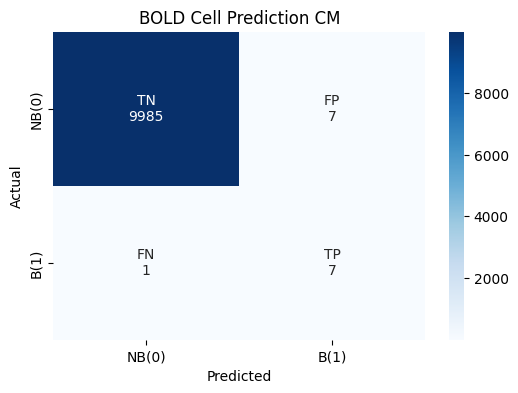


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
2,1,1,1,1,1,1,1
3,1,1,0,0,0,0,0
4,1,1,0,0,0,0,0
12,1,0,0,0,0,0,0
13,1,0,0,0,0,0,0
15,0,1,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
2,1,1,1,1,1,1,1


In [16]:
# Params
thresh = 0.95
train_loc = 0

# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=train_loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/50_val/IBACOS_FTP%20Data%20Descriptions.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(13,1): 0.948456 | (17,1): 0.949737 | (6,1): 0.952438 | (1,1): 0.952572 | (2,1): 0.955599 | (1,4): 0.958688 | (1,3): 0.960747 | (1,2): 0.961452

NB to B ratio: Predicted = 9982:18 | Actual = 9992:8
Accuracy: 99.86% | Precision: 33.33% | Recall: 75.00% | F1-Score: 0.46



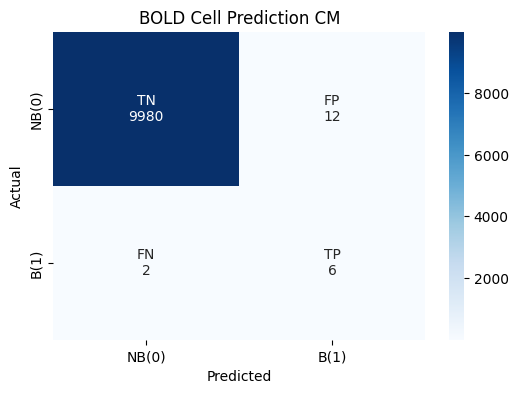


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4
1,1,1,1,1
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,1,0,0,0
8,0,1,0,0
10,1,0,0,0
11,1,1,0,0
12,0,1,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4
1,1,1,1,1
2,1,0,0,0
6,1,0,0,0
13,1,0,0,0
17,1,0,0,0


In [17]:
val_loc = 1

# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=val_loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/50_test/darrell_schoolcraft_000_1_1_1.pst.591.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(4,0): 0.857931 | (4,11): 0.893263 | (4,12): 0.904860 | (4,13): 0.909731 | (4,5): 0.921647 | (4,21): 0.921809 | (3,13): 0.924605 | (4,20): 0.927037 | (5,12): 0.928622 | (4,6): 0.931538 | (5,18): 0.931856 | (4,4): 0.932567 | (4,10): 0.933074 | (4,17): 0.933112 | (4,16): 0.933605 | (4,7): 0.935842 | (4,8): 0.936476 | (4,9): 0.938140 | (4,19): 0.939200 | (4,14): 0.941987 | (4,15): 0.942429 | (4,18): 0.943667 | (0,19): 0.944131 | (4,3): 0.944215 | (0,18): 0.944617 | (0,20): 0.945439 | (3,12): 0.946034 | (0,0): 0.946084 | (2,21): 0.946453 | (3,18): 0.946686 | (0,17): 0.947107 | (0,21): 0.947136 | (1,20): 0.947152 | (2,20): 0.947250 | (1,21): 0.947309 | (3,17): 0.947360 | (0,7): 0.947950 | (3,16): 0.948150 | (3,4): 0.948579 | (0,8): 0.948969 | (0,6): 0.949102 | (4,2): 0.949164 | (1,19): 0.949235 | (0,9): 0.950174 | (2,19): 0.950225 | (0,16): 0.950252 | (2,8): 0.951082 | (

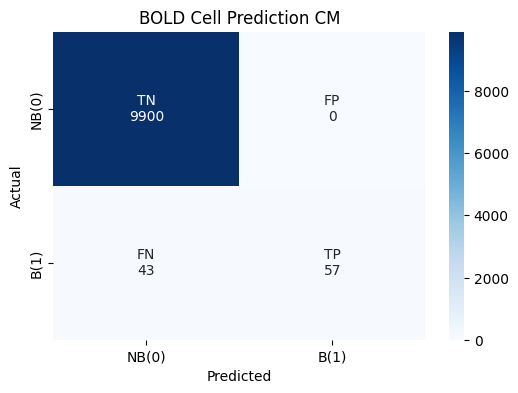


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [18]:
test_loc = 1

# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=test_loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)

## All Examples

Batch Inference: 100%|██████████| 10/10 [00:02<00:00,  4.83it/s]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 399361:639 | Actual = 399199:801
Accuracy: 99.78% | Precision: 39.01% | Recall: 35.86% | F1-Score: 0.34



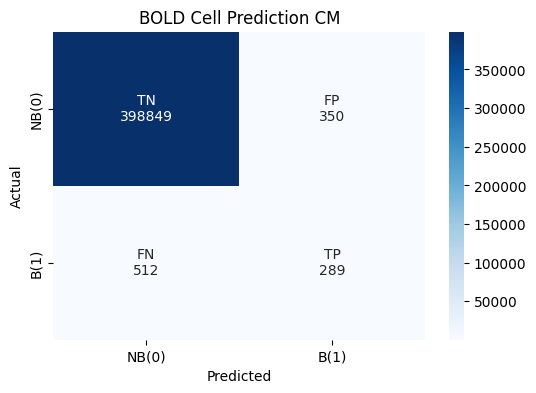

In [19]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49890:110 | Actual = 49846:154
Accuracy: 99.69% | Precision: 65.48% | Recall: 39.41% | F1-Score: 0.46



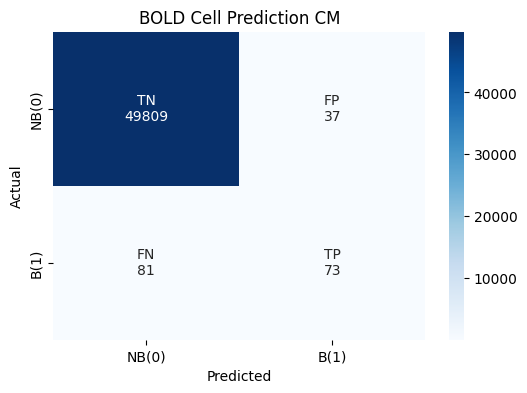

In [20]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49842:158 | Actual = 49801:199
Accuracy: 99.63% | Precision: 30.98% | Recall: 22.63% | F1-Score: 0.25



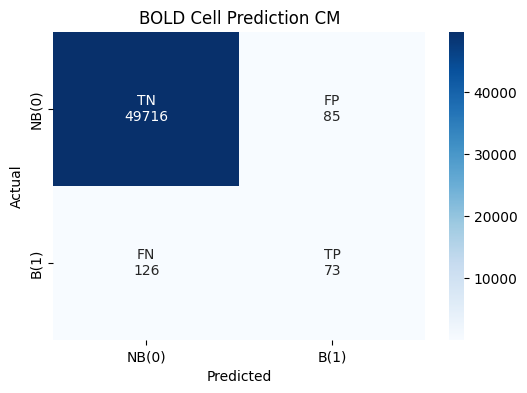

In [21]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)